In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.stats
from scipy.stats import binom, geom, chi2, moment, skew, kurtosis, chisquare
from jupyterthemes import jtplot
jtplot.style()

## Параметры
(вариант 4)

Геометрическое – G(p), p = 0.3;

Биномиальное – Bi(m,p), m = 4, p = 0.2.

In [2]:
#var 4
p = 0.3
m = 4
q = 0.2

#another var just to compare
p2 = 0.5
m2 = 5
q2 = 0.3

## Основное задание
1) Осуществить моделирование n = 1000 реализаций СВ из заданных дискретных распределений
для этого можно использовать любой генератор БСВ (как реализованный в 1-ой лабораторной
работе, так и встроенный в язык программирования). Вывести на экран несмещенные оценки
математического ожидания и дисперсии, сравнить их с истинными значениями.

In [3]:
title_geom1 = f'Geometric distribution (p = {p})'
title_binom1 = f'\nBinomial distribution (m = {m}, p = {q})'
title_geom2 = f'Geometric distribution (p = {p2})'
title_binom2 = f'\nBinomial distribution (m = {m2}, p = {q2})'

In [4]:
def get_rvs(distr, size, *param):
    b_rvs = scipy.rand(size)
    return distr.ppf(b_rvs, *param).astype(int)

In [13]:
def print_mean_var(a, distr, *params):
    true_mean, true_var = distr.mean(*params), distr.var(*params)
    mean = np.mean(a)
    mean2 = np.sum(a)/len(a)
    var = np.var(a, ddof=1)
    var2 = np.sqrt(np.sum((a-mean2)**2))/(len(a)-1)
    print(f'Mean: {mean:.3f}\nVariance: {var:.3f}')
    print(f'Mean2: {mean2:.3f}\nVariance2: {var2:.3f}')
    print(f'True mean: {true_mean:.3f}\nTrue variance: {true_var:.3f}')

print(title_geom1)
a = get_rvs(geom, 1000, p)
print_mean_var(a, geom, p)

print(title_binom1)
b = get_rvs(binom, 1000, m, q)
print_mean_var(b, binom, m, q)

Geometric distribution (p = 0.3)
Mean: 3.352
Variance: 7.886
Mean2: 3.352
Variance2: 0.089
True mean: 3.333
True variance: 7.778

Binomial distribution (m = 4, p = 0.2)
Mean: 0.801
Variance: 0.624
Mean2: 0.801
Variance2: 0.025
True mean: 0.800
True variance: 0.640


## Дополнительные задания
Для каждой из сгенерированных последовательностей:

1) Вычислить несмещенные оценки коэффициентов эксцесса и асимметрии и сравнить с
истинными значениями.

In [6]:
def print_gammas(a, distr, *params):
    gamma1 = skew(a,bias=False)
    gamma2 = kurtosis(a,bias=False)
    gamma1_true = distr.expect(lambda x:
                               (x-distr.mean(*params))**3, params) / distr.std(*params)**3
    gamma2_true = distr.expect(lambda x:
                               (x-distr.mean(*params))**4, params) / distr.std(*params)**4
    print(f'Skew: {gamma1:.3f}\nKurtosis: {gamma2:.3f}')
    print(f'True skew: {gamma1_true:.3f}\nTrue kurtosis: {gamma2_true:.3f}')

print(title_geom1)
print_gammas(a, geom, p)
print(title_binom1)
print_gammas(b, binom, m, q)

Geometric distribution (p = 0.3)
Skew: 2.420
Kurtosis: 8.473
True skew: 2.032
True kurtosis: 9.129

Binomial distribution (m = 4, p = 0.2)
Skew: 0.697
Kurtosis: -0.131
True skew: 0.750
True kurtosis: 3.063


2) Построить гистограмму и сравнить с графиком теоретического распределения
вероятностей (на одном графике).

In [7]:
def plot_hist_pmf(a, distr, *params, title=''):
    minimum = a.min()
    maximum = a.max()
    plt.figure(figsize=(10,5))
    obs,_,_ = plt.hist(a,bins=np.linspace(minimum-0.5,maximum+0.5,num=(maximum-minimum)+2))
    x = np.arange(minimum, maximum+1)
    plt.xticks(x)
    exp = len(a)*distr.pmf(x, *params)
    plt.scatter(x, exp, c = 'red', zorder=5)
    #plt.vlines(x, 0, exp, colors='#ddcccc', linestyles='dashed', lw=2)
    plt.legend(['theoretical', 'empirical'])
    plt.title(title)
    plt.show()
    return obs, exp
    
def plot_hist_cmf(a, distr, *params, title=''):
    minimum = a.min()
    maximum = a.max()
    x = np.arange(minimum, maximum+1)
    f = distr.cdf(x, *params)
    values, base = np.histogram(a,maximum-minimum)
    cumulative = np.cumsum(values)/len(a)
    plt.figure(figsize=(10,5))
    plt.ylim(0,1.05)
    plt.scatter(base[:-1], cumulative, c = 'RoyalBlue', alpha=0.7)
    plt.scatter(x[:-1], f[:-1], c = 'red', zorder=100, alpha=0.7)
    plt.xticks(x)
    plt.hlines(cumulative, base[:-1], base[1:], colors='RoyalBlue', lw=2, alpha=0.7)
    plt.hlines(f[:-1], x[:-1], x[1:], colors='red', lw=2, alpha=0.7)
    plt.legend(['theoretical', 'empirical'], loc='lower right')
    plt.title(title)
    plt.show()

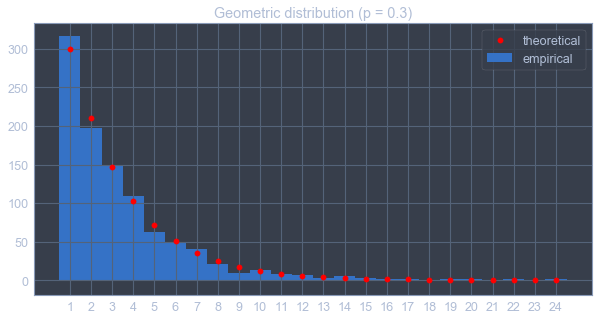

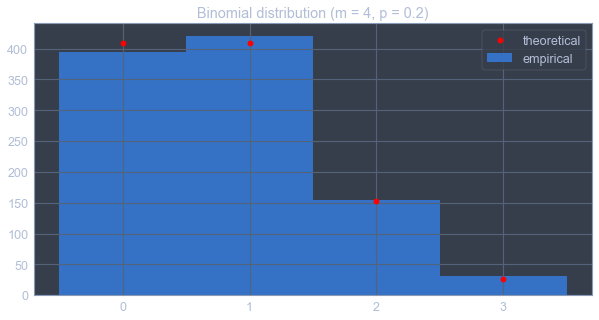

In [8]:
obs_a, exp_a = plot_hist_pmf(a, geom, p, title=title_geom1)
obs_b, exp_b = plot_hist_pmf(b, binom, m, q, title=title_binom1[1:])

3) Построить график эмпирической функции распределения и сравнить с графиком
теоретической функции распределения.

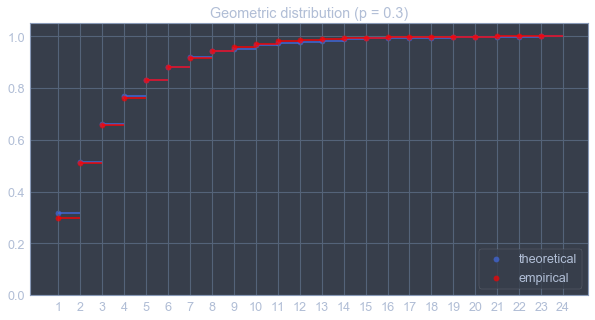

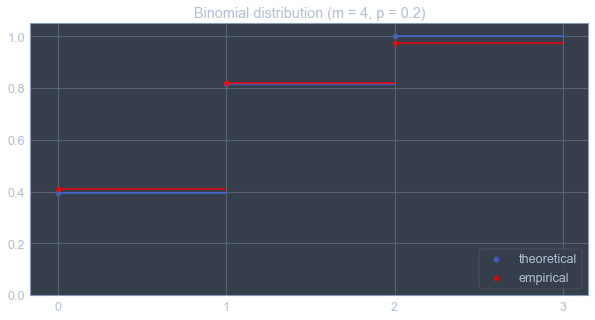

In [9]:
plot_hist_cmf(a, geom, p, title=title_geom1)
plot_hist_cmf(b, binom, m, q, title=title_binom1[1:])

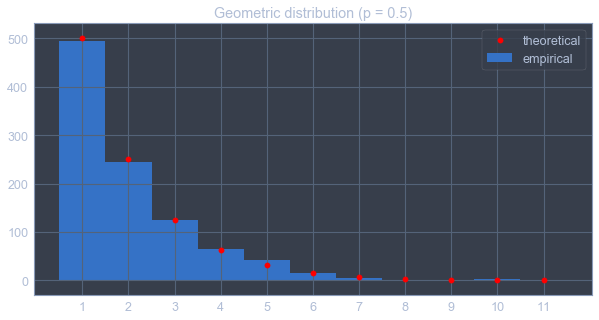

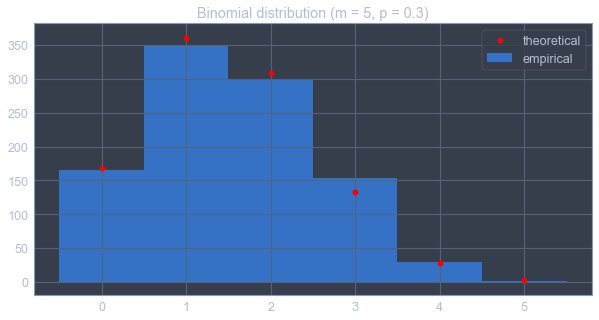

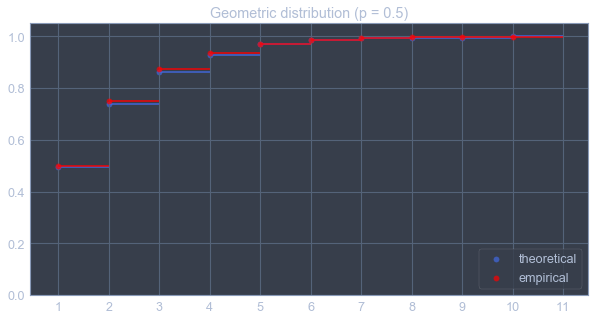

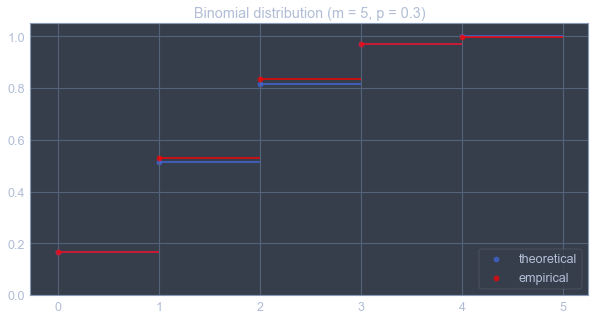

In [10]:
a2 = get_rvs(geom, 1000, p2)
b2 = get_rvs(binom, 1000, m2, q2)

obs_a2, exp_a2 = plot_hist_pmf(a2, geom, p2, title=title_geom2)
obs_b2, exp_b2 = plot_hist_pmf(b2, binom, m2, q2, title=title_binom2[1:])

plot_hist_cmf(a2, geom, p2, title=title_geom2)
plot_hist_cmf(b2, binom, m2, q2, title=title_binom2[1:])

4) Реализовать критерий хи-квадрат Пирсона проверки статистической гипотезы о
принадлежности смоделированной последовательности к заданному распределению.

In [11]:
def chisquare_test(obs, exp, p_threshold=0.05):
    df = len(obs) - 1
    x = np.sum((exp-obs)**2/exp)
    p_value = chi2.pdf(x, df)
    print(p_value)
    print('H0 is', p_value > p_threshold)

In [12]:
print(title_geom1)
chisquare_test(obs_a,exp_a)
print(title_binom1)
chisquare_test(obs_b,exp_b)

Geometric distribution (p = 0.3)
0.000735938934647136
H0 is False

Binomial distribution (m = 4, p = 0.2)
0.2114273392850754
H0 is True
